In [1]:
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Warning message:
“package ‘patchwork’ was built under R version 4.3.3”


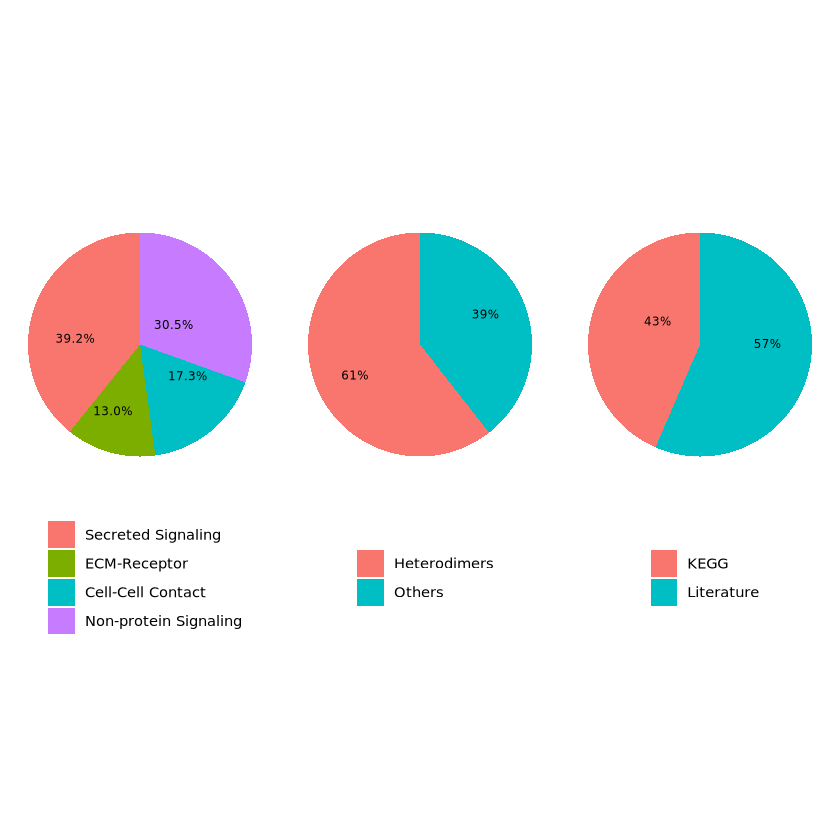

In [2]:
CellChatDB <- CellChatDB.human
showDatabaseCategory(CellChatDB)

In [4]:
dplyr::glimpse(CellChatDB$interaction)

Rows: 3,267
Columns: 28
$ interaction_name         <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2",…
$ pathway_name             <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb…
$ ligand                   <chr> "TGFB1", "TGFB2", "TGFB3", "TGFB1", "TGFB1", …
$ receptor                 <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1…
$ agonist                  <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist…
$ antagonist               <chr> "TGFb antagonist", "TGFb antagonist", "TGFb a…
$ co_A_receptor            <chr> "", "", "", "", "", "", "", "", "", "", "", "…
$ co_I_receptor            <chr> "TGFb inhibition receptor", "TGFb inhibition …
$ evidence                 <chr> "KEGG: hsa04350", "KEGG: hsa04350", "KEGG: hs…
$ annotation               <chr> "Secreted Signaling", "Secreted Signaling", "…
$ interaction_name_2       <chr> "TGFB1 - (TGFBR1+TGFBR2)", "TGFB2 - (TGFBR1+T…
$ is_neurotransmitter      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ ligand.symbol 

In [9]:
length(unique(CellChatDB$interaction$pathway_name))

[1] 296

In [3]:
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling", key = "annotation")

In [19]:
dplyr::glimpse(CellChatDB.use$interaction)

Rows: 1,281
Columns: 28
$ interaction_name         <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2",…
$ pathway_name             <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb…
$ ligand                   <chr> "TGFB1", "TGFB2", "TGFB3", "TGFB1", "TGFB1", …
$ receptor                 <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1…
$ agonist                  <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist…
$ antagonist               <chr> "TGFb antagonist", "TGFb antagonist", "TGFb a…
$ co_A_receptor            <chr> "", "", "", "", "", "", "", "", "", "", "", "…
$ co_I_receptor            <chr> "TGFb inhibition receptor", "TGFb inhibition …
$ evidence                 <chr> "KEGG: hsa04350", "KEGG: hsa04350", "KEGG: hs…
$ annotation               <chr> "Secreted Signaling", "Secreted Signaling", "…
$ interaction_name_2       <chr> "TGFB1 - (TGFBR1+TGFBR2)", "TGFB2 - (TGFBR1+T…
$ is_neurotransmitter      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ ligand.symbol 

In [4]:
length(unique(CellChatDB.use$interaction$pathway_name))

[1] 158

In [4]:
unique(CellChatDB.use$interaction$pathway_name)

[1] "TGFb"         "BMP"          "BMP10"        "GDF"          "MSTN"        
  [6] "AMH"          "GDNF"         "NODAL"        "ACTIVIN"      "WNT"         
 [11] "ncWNT"        "EGF"          "NRG"          "FGF"          "PDGF"        
 [16] "VEGF"         "IGF"          "INSULIN"      "APELIN"       "HH"          
 [21] "CCL"          "CXCL"         "MIF"          "CX3C"         "XCR"         
 [26] "IL2"          "IL4"          "IL6"          "IL12"         "LIFR"        
 [31] "OSM"          "IL10"         "IL1"          "IL17"         "CSF"         
 [36] "IL16"         "EPO"          "GH"           "PRL"          "THPO"        
 [41] "CSF3"         "IFN-I"        "IFN-II"       "TNF"          "LT"          
 [46] "LIGHT"        "FASLG"        "VEGI"         "TRAIL"        "EDA"         
 [51] "NGF"          "RANKL"        "TWEAK"        "CD70"         "CD30"        
 [56] "CD137"        "OX40"         "GITRL"        "APRIL"        "BAFF"        
 [61] "CD40"         "SPP1"         "ADIPONECTIN"  "RESISTIN"     "VISFATIN"    
 [66] "ANGPTL"       "ANGPT"        "MK"           "PTN"          "PERIOSTIN"   
 [71] "AGT"          "GPR"          "BRADYKININ"   "COMPLEMENT"   "CCK"         
 [76] "EDN"          "GALANIN"      "GHRELIN"      "KISS1"        "MELANOCORTIN"
 [81] "NMU"          "NPFF"         "NPY"          "NPW-B"        "NTS"         
 [86] "OPIOID"       "HCRT"         "OXT"          "SOMATOSTATIN" "TAC"         
 [91] "UTS2"         "AVP"          "PRLH"         "PARs"         "PMCH"        
 [96] "PROK"         "PACAP"        "VIP"          "NPR1"         "NPR2"        
[101] "KIT"          "GIPR"         "FSH"          "LHB"          "TSH"         
[106] "NT"           "FLT3"         "HGF"          "SEMA3"        "CALCR"       
[111] "ANNEXIN"      "APJ"          "CRH"          "ENHO"         "GAS"         
[116] "GCG"          "GHRH"         "GNRH"         "GRN"          "GUCA"        
[121] "RLN"          "LEP"          "GALECTIN"     "NPS"          "NPVF"        
[126] "OSTN"         "PROS"         "PSAP"         "PTH"          "QRFP"        
[131] "CHEMERIN"     "SAA"          "UGRP1"        "SCT"          "SLURP"       
[136] "BTLA"         "TRH"          "UCN"          "UROTENSIN"    "BAG"         
[141] "KLK"          "ADM"          "CALC"         "IAPP"         "PROCR"       
[146] "TAFA"         "CTSG"         "GRP"          "PTPR"         "SLITRK"      
[151] "IGFBP"        "CypA"         "PROC"         "MHC-I"        "RBP4"        
[156] "SLIT"         "TULP"         "PLAU"

In [ ]:
cellchat = readRDS("cellchat_popT_HC1.rds")

In [25]:
cellchat

An object of class CellChat created from a single dataset 
 36601 genes.
 50140 cells. 
CellChat analysis of single cell RNA-seq data! 

# Viz aggregated cell-cell communication network

In [3]:
ptm = Sys.time()
cellchat <- aggregateNet(cellchat)
execution.time = Sys.time() - ptm
print(as.numeric(execution.time, units = "secs"))

[1] 0.005846739


In [ ]:
ptm = Sys.time()
groupSize <- as.numeric(table(cellchat@idents))
# par(mfrow = c(1,2), xpd=TRUE)
pdf("../../man_figs_pdf/cellchat_interactions_count_HC.pdf", width = 8, height = 8)
p1 = netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge = F, title.name = "Number of interactions")
dev.off()

pdf("../../man_figs_pdf/cellchat_interaction_weights_HC.pdf", width = 8, height = 8)
p2 = netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge = F, title.name = "Interaction weights/strength")
dev.off()

png 
  2

png 
  2

# Viz edge weights from diff cell groups

[1] "Ast"    "Endo"   "ExNeur" "InNeur" "Mic"    "Oligo"  "OPC"    "Peri"  


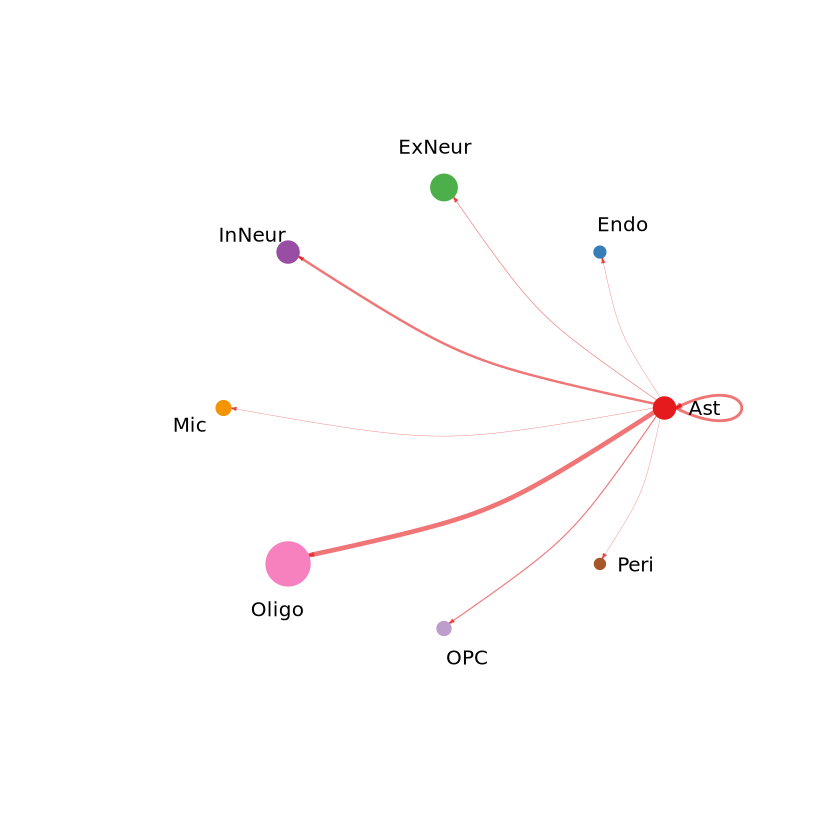

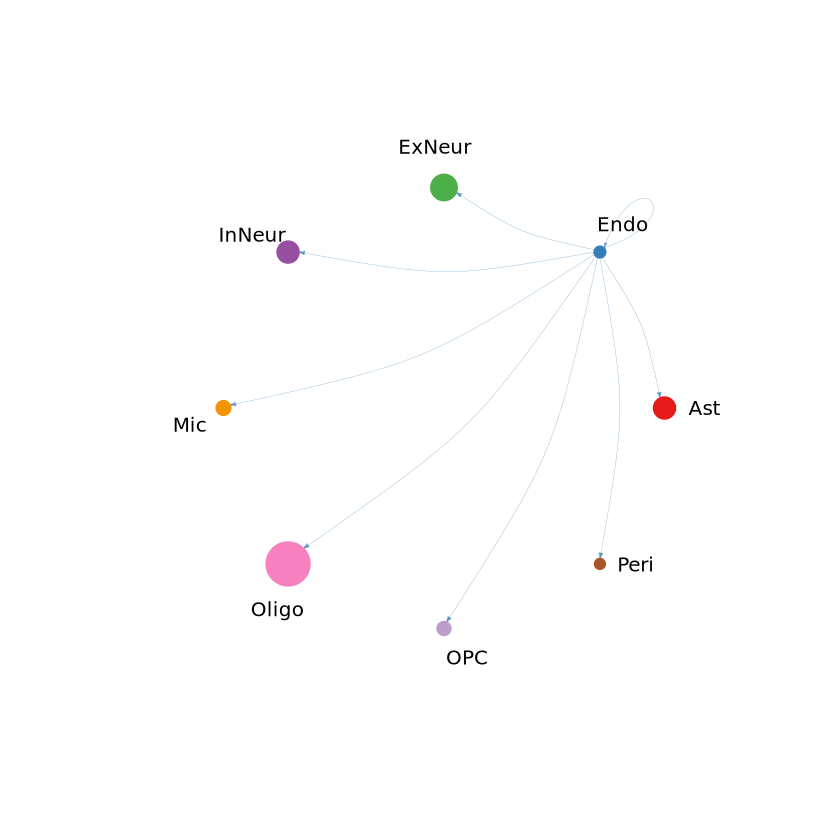

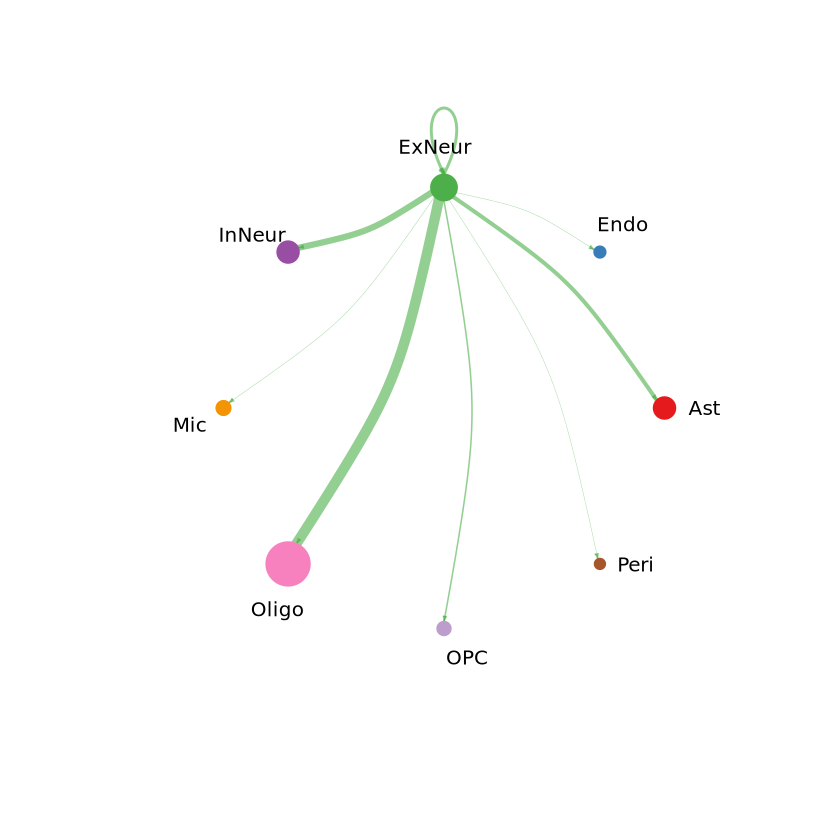

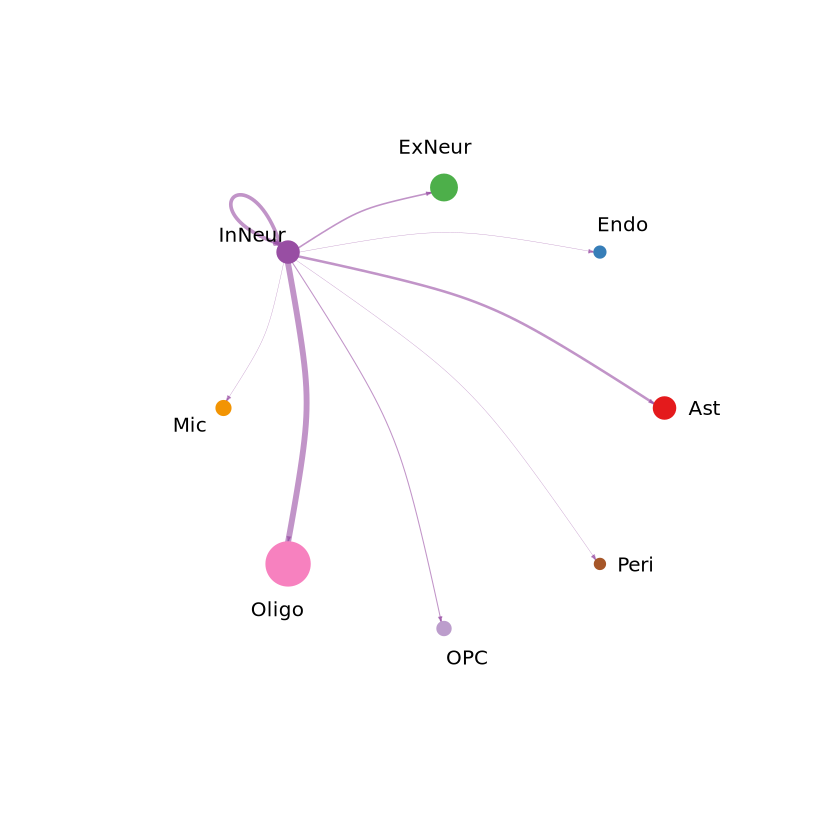

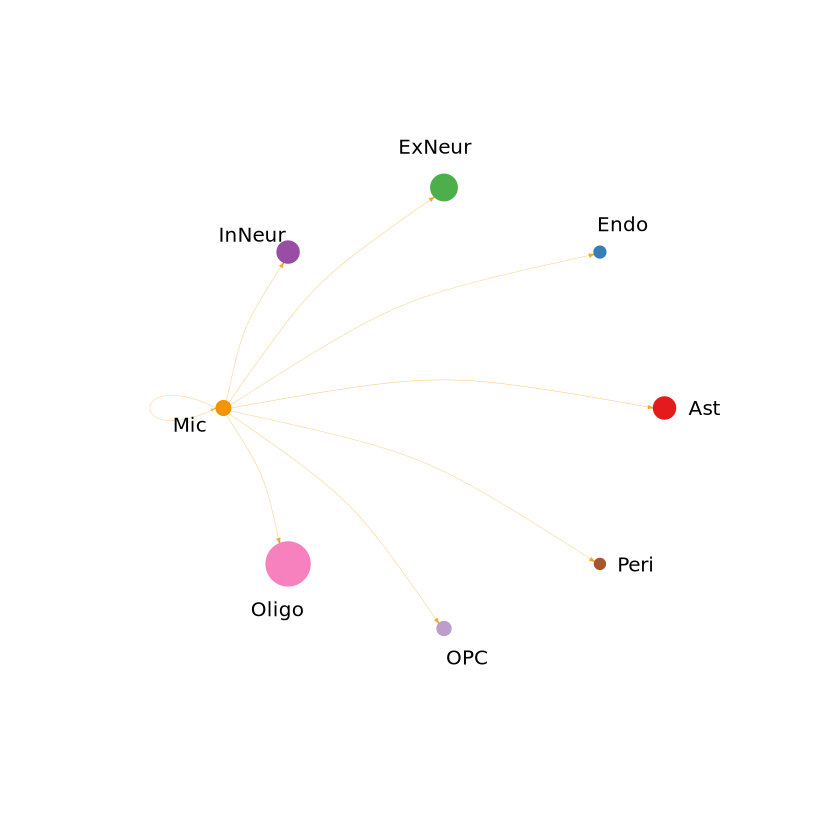

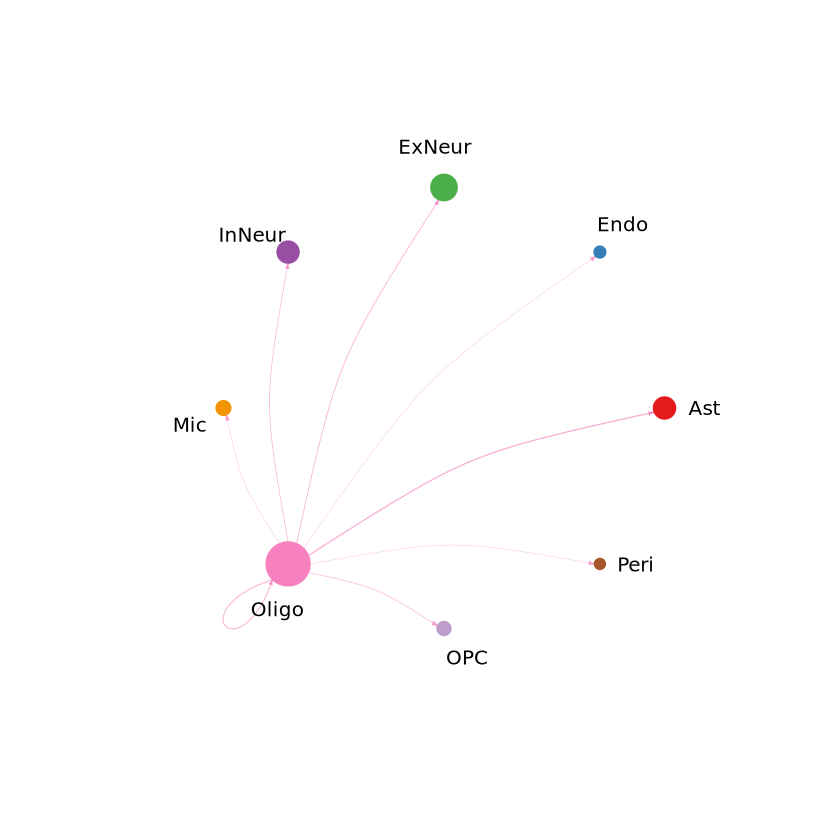

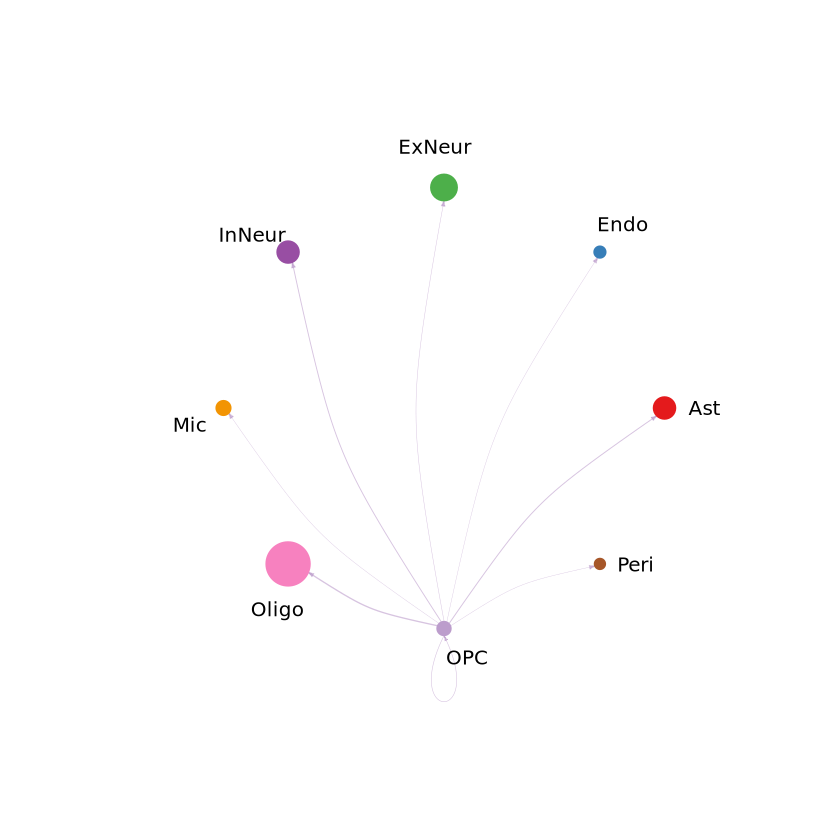

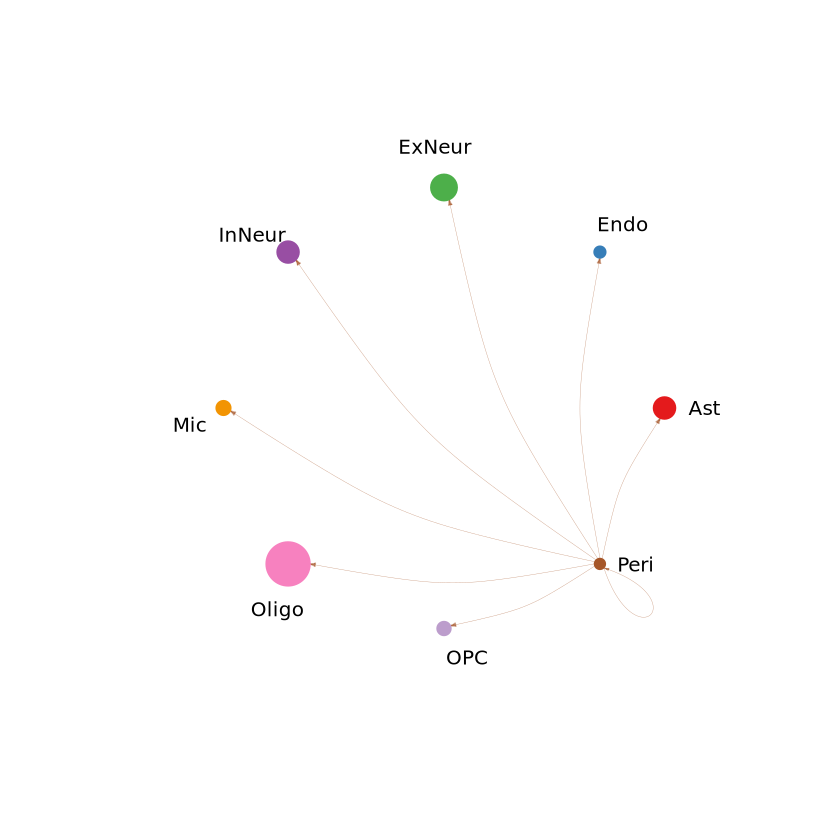

In [5]:
mat <- cellchat@net$weight
print(rownames(mat))
# par(mfrow = c(3,4), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, edge.weight.max = max(mat), title.name = rownames(mat)[i])
}

## Viz each signalling pathway

In [4]:
# all signaling pathways showing significant communications
cellchat@netP$pathways

[1] "NRG"    "SLIT"   "PTN"    "BMP"    "PTPR"   "SPP1"   "FGF"    "SLITRK"
 [9] "PDGF"   "SEMA3"  "IGF"    "PSAP"   "EGF"    "TGFb"   "PROS"   "CypA"  
[17] "TULP"   "ANGPT"  "EDN"

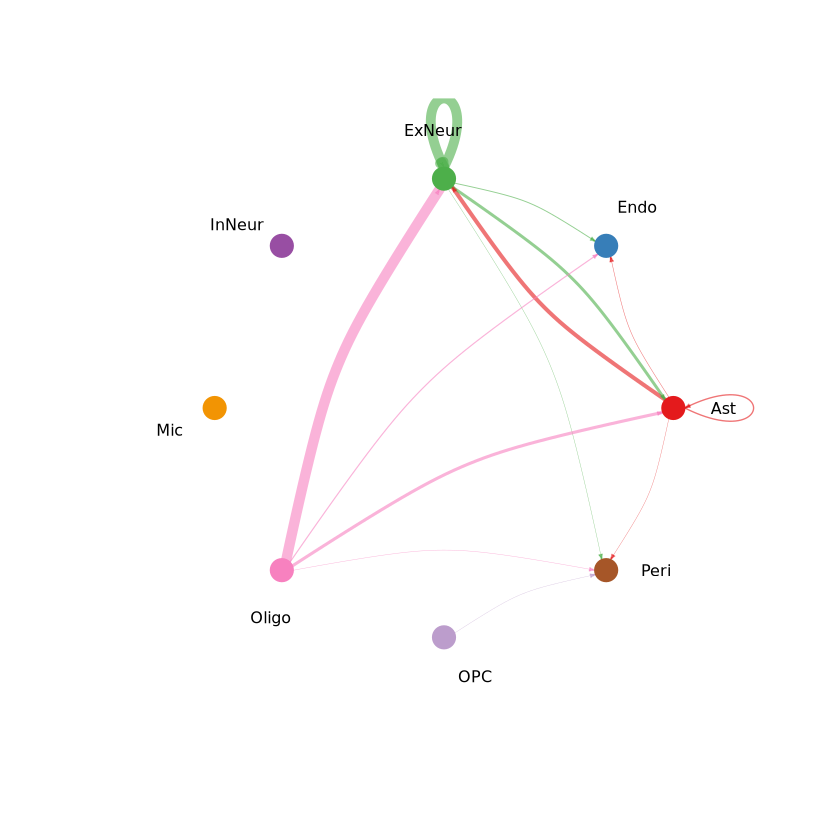

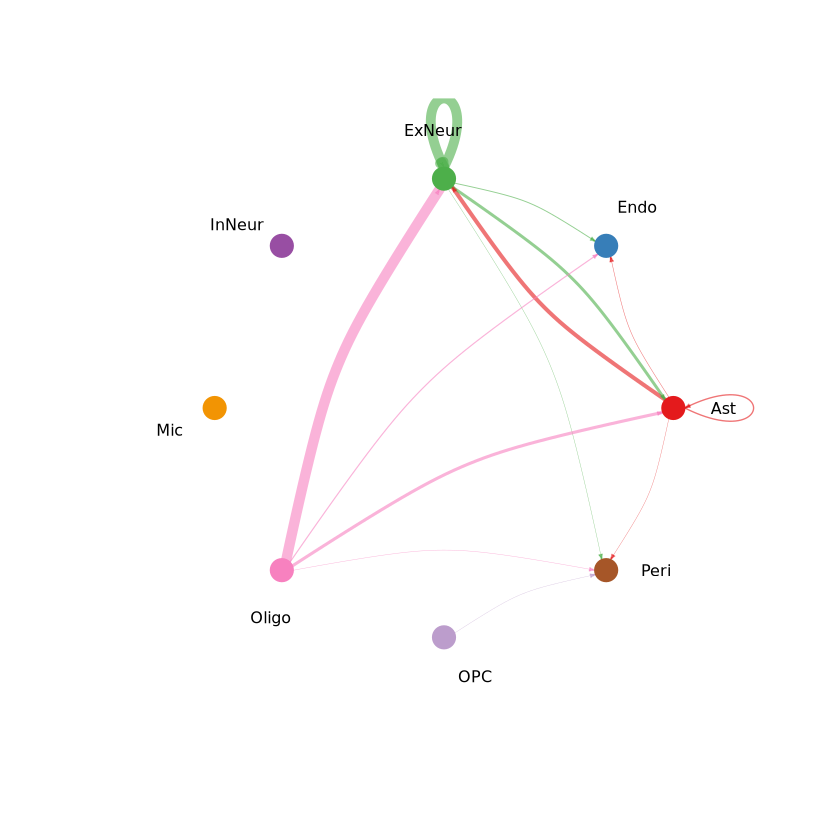

In [6]:
pathways.show <- c("SEMA3") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# # Circle plot
# par(mfrow=c(1,1))
# netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")

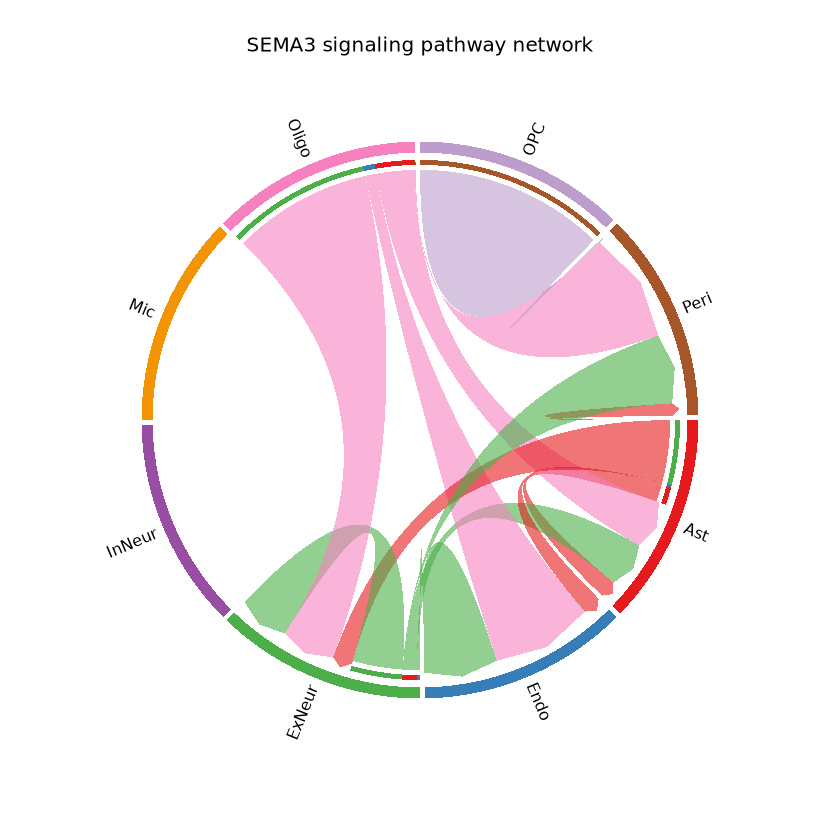

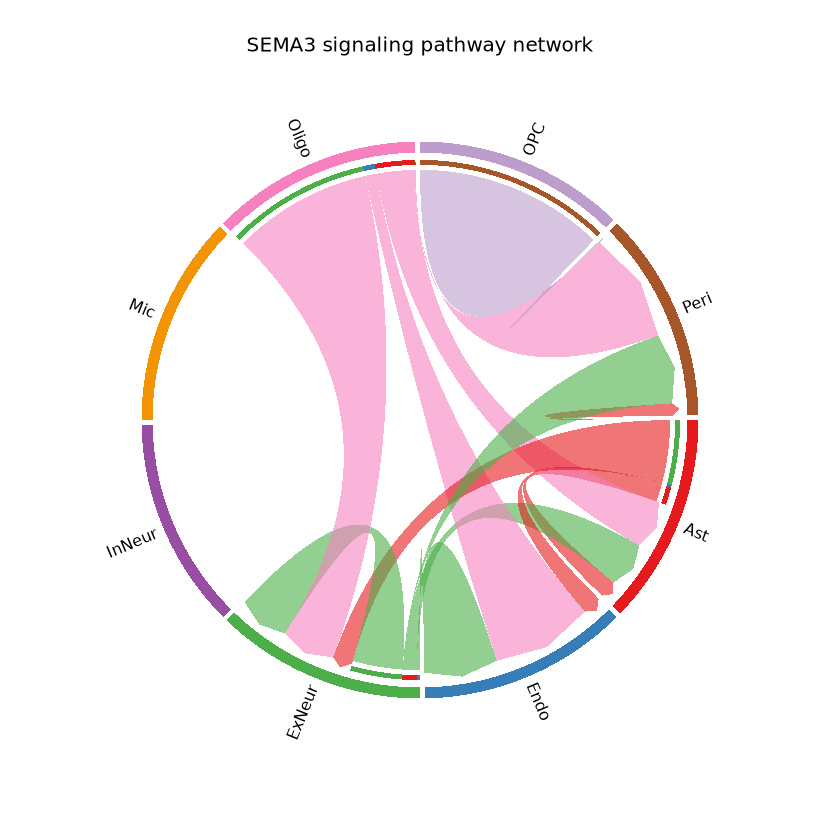

In [7]:
# Generate a larger, less crowded chord diagram
netVisual_aggregate(
  cellchat,
  signaling = pathways.show,
  layout = "chord"
)

In [8]:
# Heatmap
# par(mfrow=c(1,1))
p = netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")

Do heatmap based on a single object 




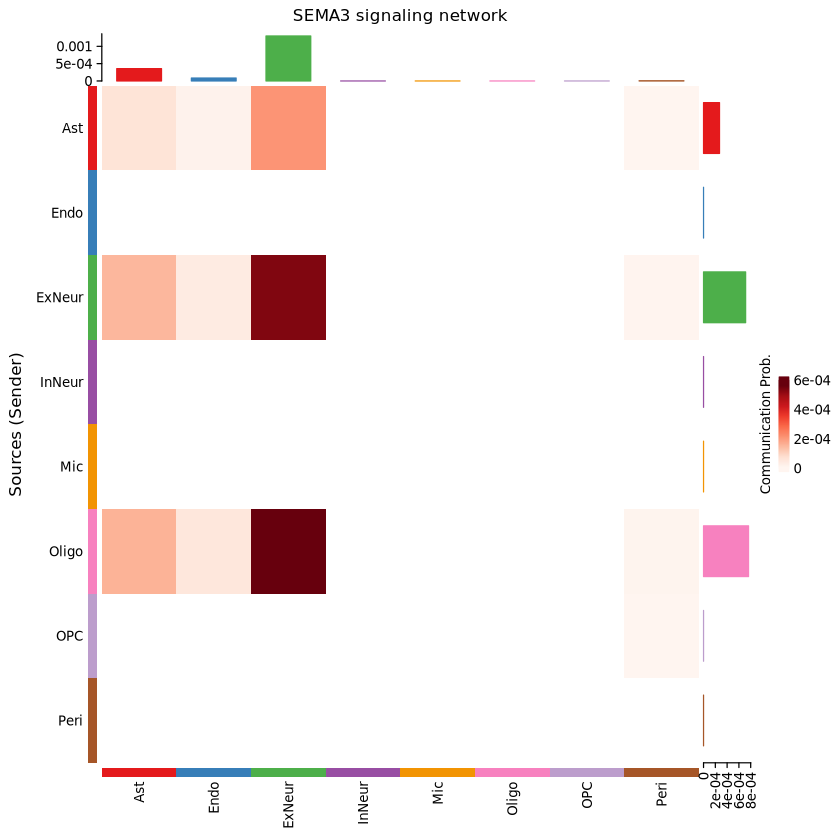

In [9]:
p

## Viz single ligand-receptor pair

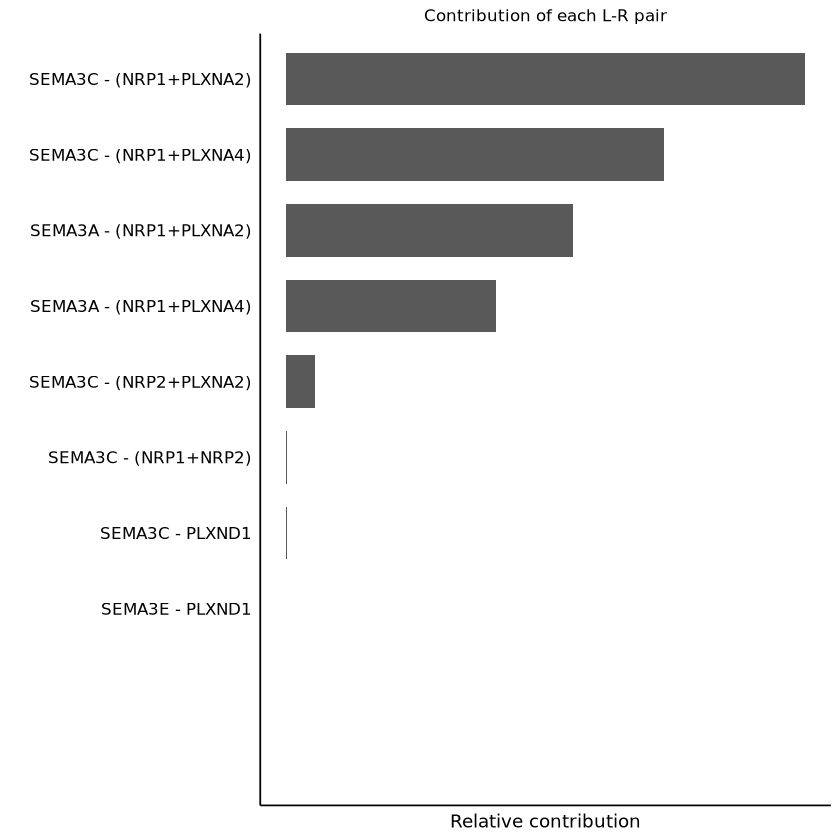

In [10]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[[1]]


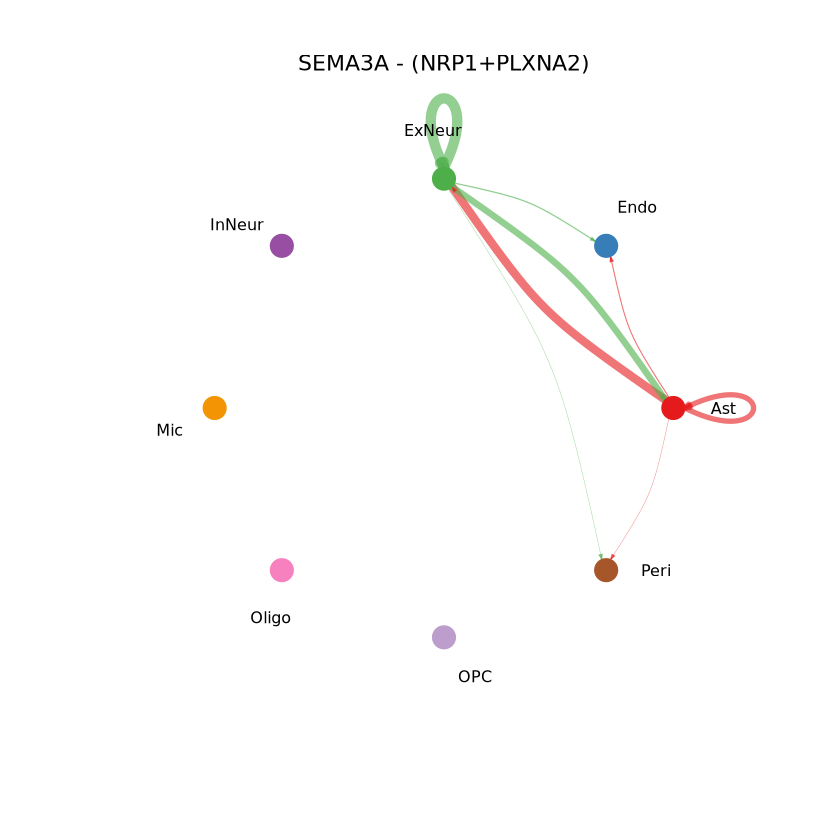

In [13]:
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[1,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)

# Circle plot
# netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")

[[1]]


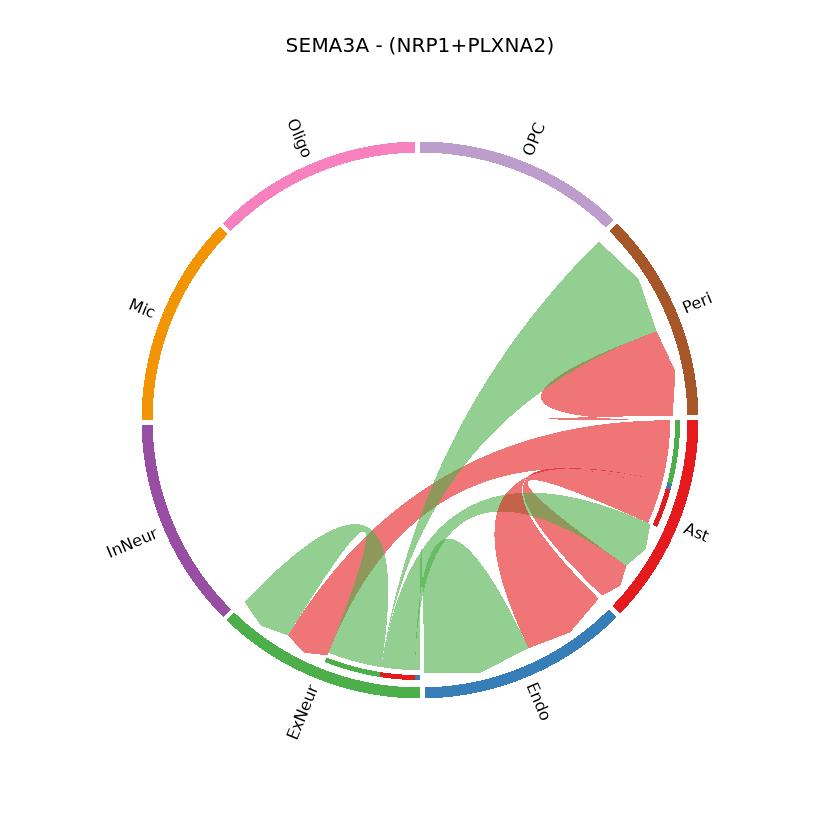

In [14]:
# Chord diagram
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")

# Save plots for all signaling pathways

In [ ]:
prefix = "../../figures/cell_chat_popT/"
# Access all the signaling pathways showing significant communications
pathways.show.all <- cellchat@netP$pathways
# check the order of cell identity to set suitable vertex.receiver
levels(cellchat@idents)
vertex.receiver = seq(1,4)
for (i in 1:length(pathways.show.all)) {
  pdf(paste0("../../man_figs_pdf/cell_chat_HC_const_weight/",pathways.show.all[i],".pdf"), width = 8, height = 8)
  # Visualize communication network associated with both signaling pathway and individual L-R pairs
  netVisual_aggregate(cellchat, signaling = pathways.show.all[i],layout = "chord")
  # netVisual_aggregate(cellchat,
  #                     signaling = pathways.show.all[i],
  #                     layout = "circle",
  #                     edge.width.max = 30)
  dev.off()
  # Compute and visualize the contribution of each ligand-receptor pair to the overall signaling pathway
  gg <- netAnalysis_contribution(cellchat, signaling = pathways.show.all[i])
  ggsave(filename=paste0(prefix, paste0(pathways.show.all[i], "_L-R_contribution.pdf")), plot=gg, width = 6, height = 4, units = 'in', dpi = 300)
}

[1] "Ast"   "Endo"  "ExN"   "InN"   "Mic"   "Oligo" "OPC"

In [ ]:
prefix <- "../../man_figs_pdf/cell_chat_HC_const_weight/"

# 1. get all the significant pathways
pathways.show.all <- cellchat@netP$pathways
pathways.show.all <- c('SEMA3')

# 2. define the cell types to keep (everything except "Mic")
# keep.cells   <- setdiff(levels(cellchat@idents), "Mic")
keep.cells <- levels(cellchat@idents)
keep.indices <- which(levels(cellchat@idents) %in% keep.cells)

for (pathway in pathways.show.all) {
  # — Chord plot without "Mic" —
  pdf(
    file   = paste0(prefix, pathway, "_chord_noMic.pdf"),
    width  = 8, height = 8
  )
  netVisual_aggregate(
    object       = cellchat,
    signaling    = pathway,
    layout       = "chord",
    sources.use  = keep.indices,    # only these as senders
    targets.use  = keep.indices,     # only these as receivers
    remove.isolate = FALSE
  )
  dev.off()
  
}

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


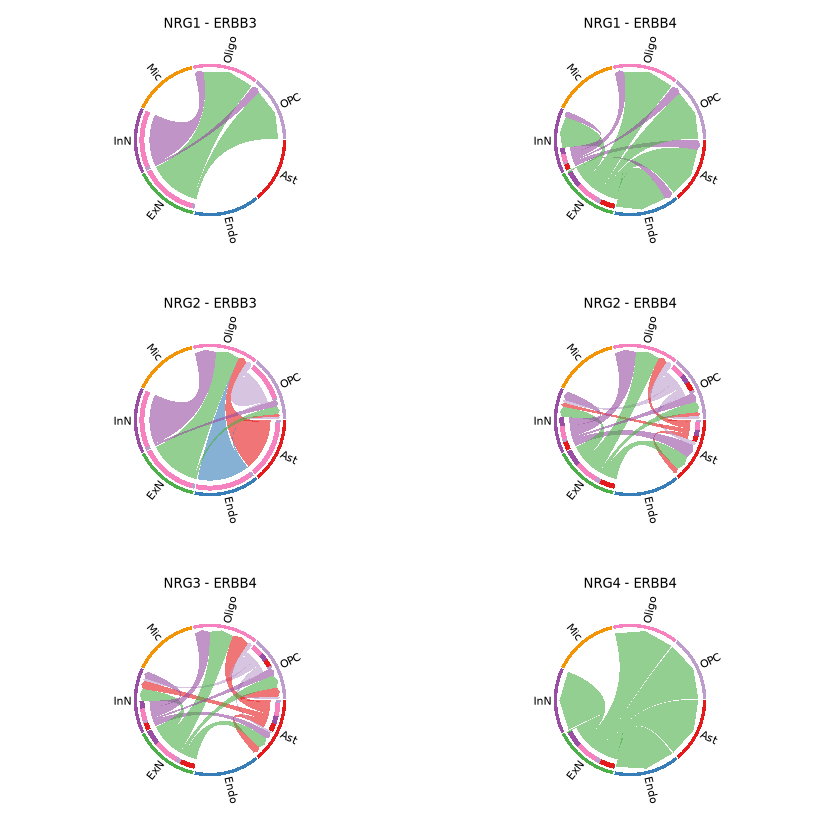

In [10]:
netVisual_individual(cellchat, signaling = 'NRG', layout = "chord")

In [14]:
cellchat@netP$pathways

[1] "NRG"    "SLIT"   "PTPR"   "PTN"    "FGF"    "SLITRK" "SPP1"   "BMP"   
 [9] "SEMA3"  "PSAP"   "IGF"    "PDGF"   "TULP"   "PROS"   "TGFb"   "EGF"   
[17] "CypA"   "EDN"    "ANGPT"

# Viz multiple ligand-receptors or signaling pathways

In [ ]:
library(ggplot2)
df <- data.frame(
  disease    = c("HC", "RBD", "PD"),
  comm_prob  = c(0.1195638, 0.1191152, 0.1481818)
)
df$disease <- factor(df$disease, levels = c("HC", "RBD", "PD"))  # Set order
df$label <- sprintf("%.4f", round(df$comm_prob, 4))
custom_colors <- c("HC"  = "#00BA38",
                   "RBD" = "#619CFF",
                   "PD"  = "#F8766D")
pdf("../../man_figs_pdf/cell_chat_HC/Ast_to_Oligo_commProb_barplot.pdf", width = 6, height = 4)
ggplot(df, aes(x = disease, y = comm_prob, fill = disease)) +
  geom_col() +
  geom_text(aes(label = label), vjust = -0.5, size = 3) +
  scale_fill_manual(
    name = "Disease Status",
    values = custom_colors,
    breaks = c("HC", "RBD", "PD")  # Explicit legend order
  ) +
  labs(
    title = "Communication Probability of Ast to Oligo in PSAP-GPR37",
    x     = "Disease Status",
    y     = "Communication Probability"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position     = "right",
    panel.grid.major.x  = element_blank(),
    panel.grid.minor    = element_blank()
  )
dev.off()

png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("PSAP"))
pdf(paste0("../../man_figs_pdf/cell_chat_HC/Ast_Out_LR_pathway_PSAP.pdf"), width = 4, height = 4)
netVisual_bubble(
  cellchat,
  sources.use = 1,
  targets.use = c(1,2,3,4,5,6,7),
  pairLR.use = pairLR.use,
  remove.isolate = FALSE
)
dev.off()

Comparing communications on a single object 




png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("NRG", "SLIT"))
pdf(paste0("../../man_figs_pdf/cell_chat_HC/Oligo_Out_LR_pathway_NRG_SLIT.pdf"), width = 4, height = 4)
netVisual_bubble(
  cellchat,
  sources.use = 6,
  targets.use = c(1,2,3,4,5,6,7),
  pairLR.use = pairLR.use,
  remove.isolate = FALSE,
  thresh = 1.0  # more stringent significance threshold
)
dev.off()

Comparing communications on a single object 


Warning message in subsetCommunication_internal(net, LR, cells.level, slot.name = slot.name, :
“No significant signaling interactions are inferred!”
Warning message in min(df$prob, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in max(df$prob, na.rm = T):
“no non-missing arguments to max; returning -Inf”


png 
  2

In [ ]:
# (1) show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
# 'Ast''Endo''ExNeur''InNeur''Mic''Oligo''OPC'
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("GAS","PDGF", "PSAP", "SPP1"))
pdf(paste0("../../man_figs_pdf/cell_chat_HC/Mic_Out_LR_pathway.pdf"), width = 8, height = 8)
netVisual_bubble(cellchat, sources.use = 5, targets.use = c(1,2,3,4,6,7), pairLR.use = pairLR.use, remove.isolate = FALSE)
dev.off()

There is no significant communication of GAS

Comparing communications on a single object 




png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("FGF","NRG", "PDGF", "CypA", "PROS", "PSAP", "PTPR", "SEMA3", "SLIT", "SLITRK", "TULP"))
pdf(paste0("../../man_figs_pdf/cell_chat_HC/ExN_Out_LR_pathway.pdf"), width = 8, height = 8)
netVisual_bubble(cellchat, sources.use = 3, targets.use = c(1,2,4,5,6,7), remove.isolate = FALSE, pairLR.use = pairLR.use)
dev.off()

Comparing communications on a single object 




png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("IGF","NRG", "PSAP", "PTPR", "SLIT", "SLITRK", "TGFb"))
pdf(paste0("../../man_figs_pdf/cell_chat_HC/InN_Out_LR_pathway.pdf"), width = 8, height = 8)
netVisual_bubble(cellchat, sources.use = 4, targets.use = c(1,2,3,5,6,7), remove.isolate = FALSE, pairLR.use = pairLR.use)
dev.off()

Comparing communications on a single object 




png 
  2

In [ ]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("ANGPT","BMP","FGF", "NRG", "PDGF", "PROS", "PSAP", "PTN", "PTPR", "SEMA3", "TGFb", "VEGF"))
pdf(paste0("../../man_figs_pdf/cell_chat_HC/Ast_Out_LR_pathway.pdf"), width = 8, height = 8)
netVisual_bubble(cellchat, sources.use = 1, targets.use = c(2,3,4,5,6,7), remove.isolate = FALSE, pairLR.use = pairLR.use)
dev.off()

There is no significant communication of VEGF

Comparing communications on a single object 




png 
  2

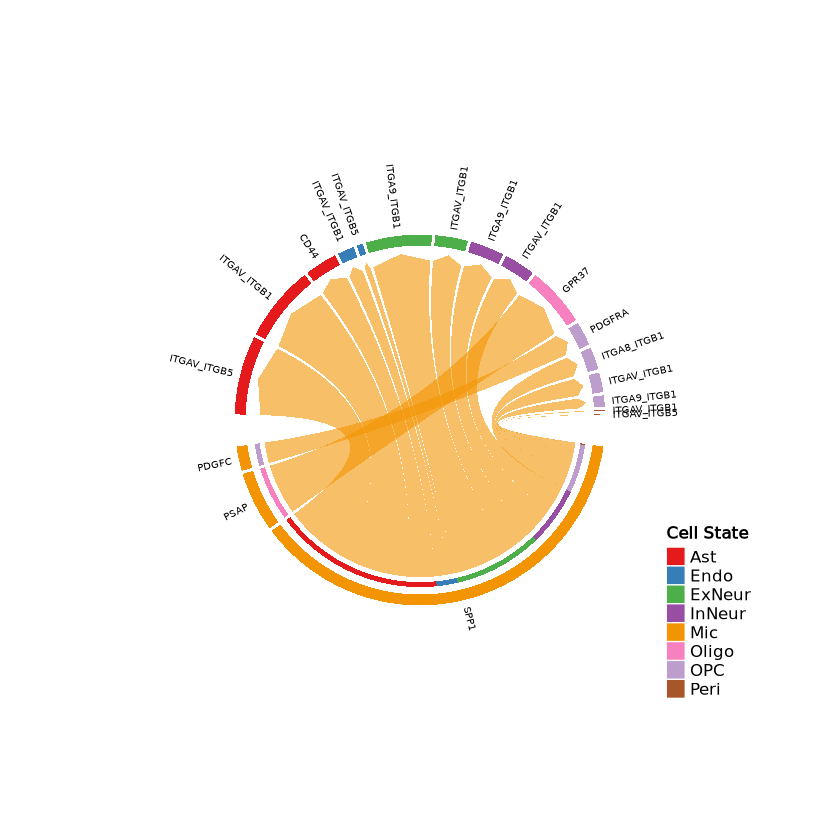

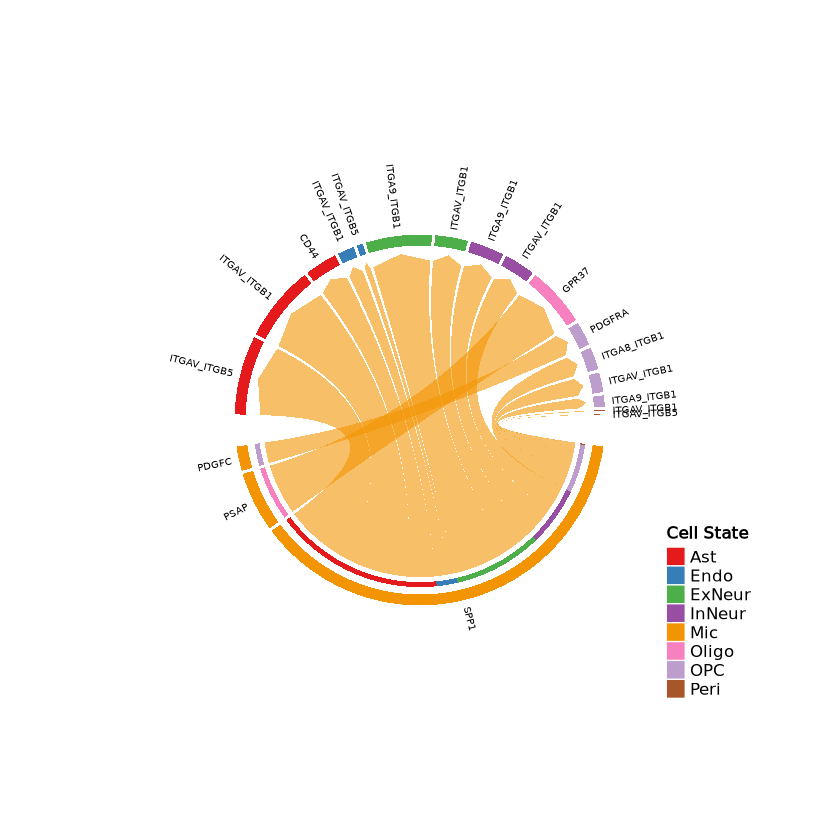

In [19]:
# show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
# show all the interactions sending from ExN
netVisual_chord_gene(cellchat, sources.use = 5, targets.use = c(1,2,3,4,6,7,8), lab.cex = 0.5,legend.pos.y = 30)

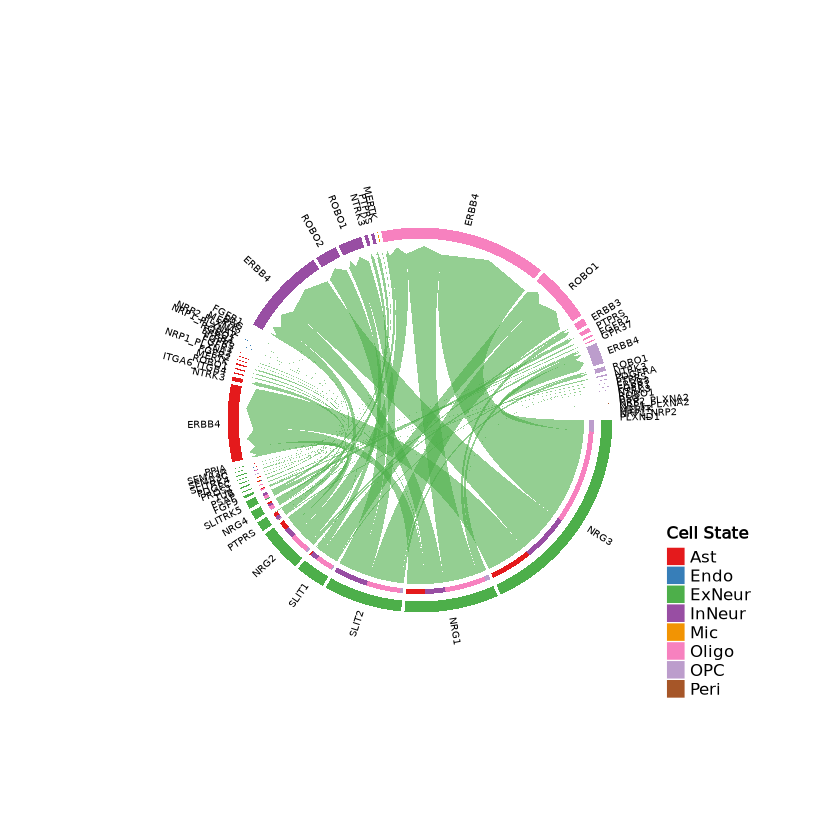

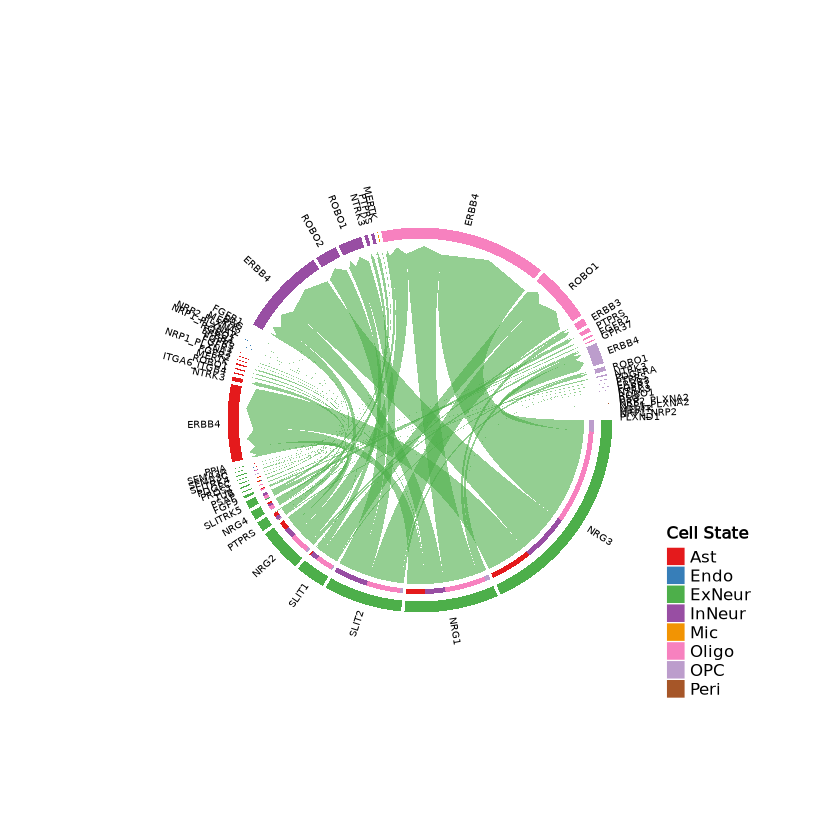

In [17]:
# show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
# show all the interactions sending from ExN
netVisual_chord_gene(cellchat, sources.use = 3, targets.use = c(1,2,4,5,6,7,8), lab.cex = 0.5,legend.pos.y = 30)

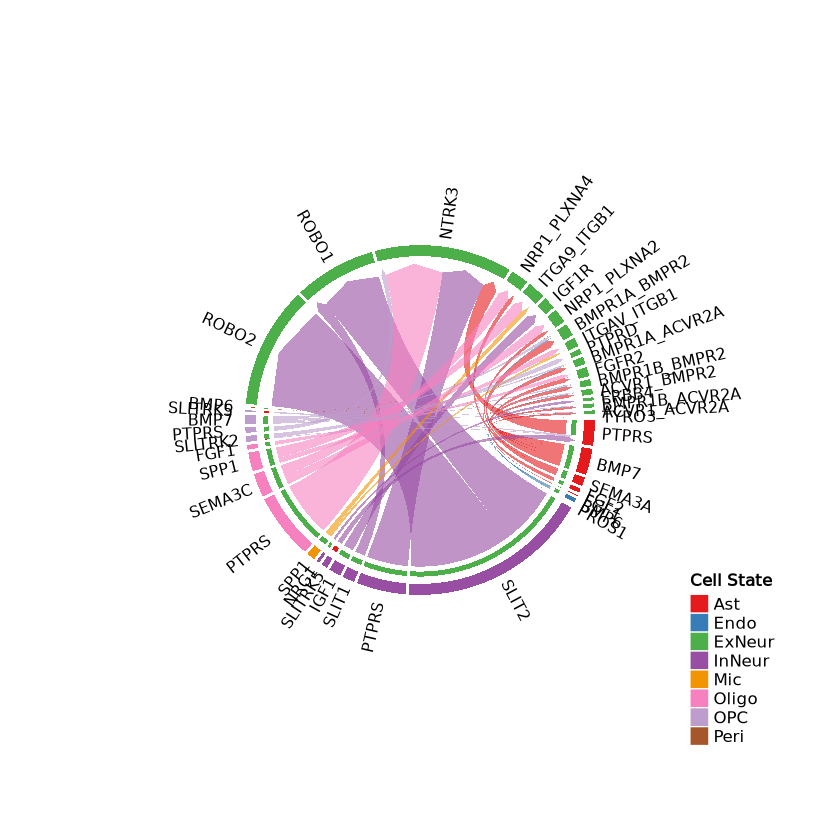

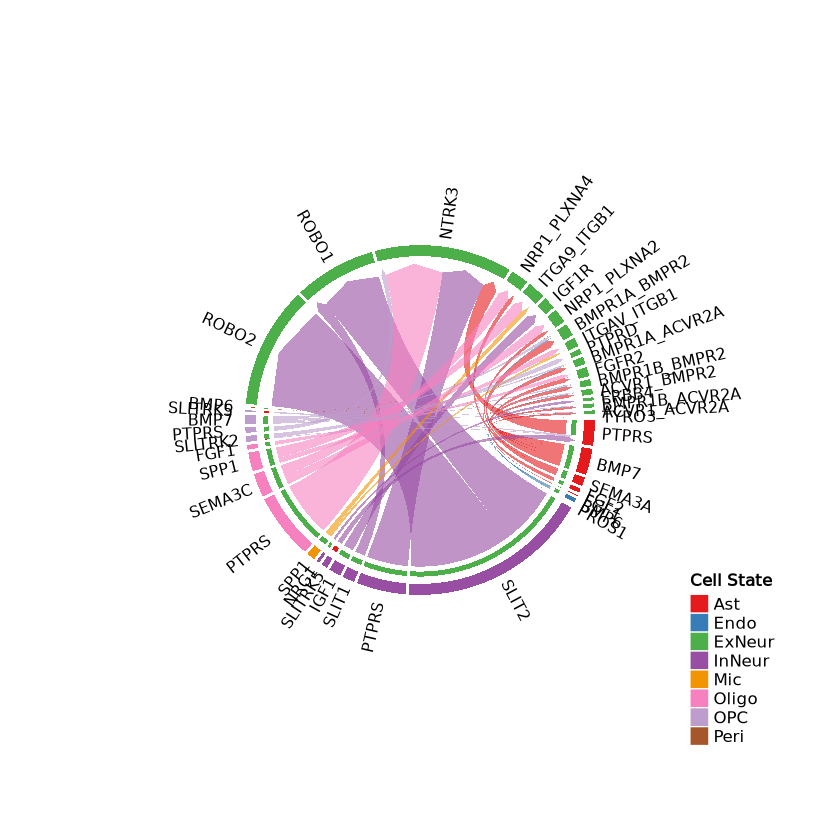

In [20]:
# show all the interactions received by Ex Neurons
netVisual_chord_gene(cellchat, sources.use = c(1,2,4,5,6,7,8), targets.use = 3, legend.pos.x = 15)